# Comparing WFS Results across fields of different stellar density

Using the new methods developed by the UW team:

1. Find donuts from image
2. Identify single, well separated donuts
3. Only use isolated donuts in field to measure Zernike polynomials with WFS code

Here in this notebook we show this new method applied to four fields simulated from Gaia data at 4 galactic latitudes to represent 4 different stellar densities on the focal plane.

## Set up

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
import os
import sys
sys.path.append('../analysis_tools/')
import lsst.daf.persistence as dafPersist
from calcMetrics import calcMetrics
from copy import deepcopy

In [3]:
data_dir = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/high_lat/'

In [4]:
single_donut = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_notebooks/notebook_data/wfs.zer.singleStar.5'
#users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.singleStar.5'

In [5]:
opd_file_name = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_gt11/iter0/img/opd.zer.gaia'

In [6]:
opd_data = np.genfromtxt(opd_file_name)
single_star_wfs = np.genfromtxt(single_donut)

In [7]:
single_errors = np.sqrt(np.mean((opd_data - single_star_wfs)**2., axis=0))

In [8]:
calcCentroidMetrics = calcMetrics()

## Load previously calculated results from running the close loop with the following settings:

```
doDeblending: True

deblendDonutAlgo: convolveTemplate

centroidTemplateType: model

deblendTemplateType: isolatedDonutFromImage

minUnblendedDistance: 160 or 70
```

Where the minUnblended distance sets the bound on what donuts to keep for running the WFS code

In [12]:
data_dir = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/high_lat/'
pix_array = [160, 130, 100, 70]
pix_array = [160, 70]
ssrHighTotalVals = []
ssrHighFieldVals = []
zernikeErrors = []
for pix_sep in pix_array:
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.isoCorr.gaiaHigh.%ipx' % (pix_sep))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opd_file_name, wfsZkFilePath)
    zernikeErrors.append(np.sqrt((wfsData - opdData)**2.))
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrHighFieldVals.append(zerFieldSSR)
    ssrHighTotalVals.append(zerTotalSSR)
    #print(wfsData[5])
zernikeErrors = np.array(zernikeErrors)
zernikeHighErrors = deepcopy(np.transpose(zernikeErrors, axes=(2,1,0)))
ssrHighFieldVals = np.array(ssrHighFieldVals)

In [15]:
data_dir = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/medium_lat/'
pix_array = [160, 70]
ssrMedTotalVals = []
ssrMedFieldVals = []
zernikeErrors = []
for pix_sep in pix_array:
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.isoCorr.gaiaMedium.%ipx' % (pix_sep))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opd_file_name, wfsZkFilePath)
    zernikeErrors.append(np.sqrt((wfsData - opdData)**2.))
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrMedFieldVals.append(zerFieldSSR)
    ssrMedTotalVals.append(zerTotalSSR)
    #print(wfsData[5])
zernikeErrors = np.array(zernikeErrors)
zernikeMedErrors = deepcopy(np.transpose(zernikeErrors, axes=(2,1,0)))
ssrMedFieldVals = np.array(ssrMedFieldVals)

In [16]:
data_dir = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/low_lat/'
pix_array = [160, 70]
ssrLowTotalVals = []
ssrLowFieldVals = []
zernikeErrors = []
for pix_sep in pix_array:
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.isoCorr.gaiaLow.%ipx' % (pix_sep))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opd_file_name, wfsZkFilePath)
    zernikeErrors.append(np.sqrt((wfsData - opdData)**2.))
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrLowFieldVals.append(zerFieldSSR)
    ssrLowTotalVals.append(zerTotalSSR)
    #print(wfsData[5])
zernikeErrors = np.array(zernikeErrors)
zernikeLowErrors = deepcopy(np.transpose(zernikeErrors, axes=(2,1,0)))
ssrLowFieldVals = np.array(ssrLowFieldVals)

In [17]:
data_dir = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/baade/'
pix_array = [160, 70]
ssrBaadeTotalVals = []
ssrBaadeFieldVals = []
zernikeErrors = []
for pix_sep in pix_array:
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.isoCorr.gaiaBaade.%ipx' % (pix_sep))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opd_file_name, wfsZkFilePath)
    zernikeErrors.append(np.sqrt((wfsData - opdData)**2.))
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrBaadeFieldVals.append(zerFieldSSR)
    ssrBaadeTotalVals.append(zerTotalSSR)
    #print(wfsData[5])
zernikeErrors = np.array(zernikeErrors)
zernikeBaadeErrors = deepcopy(np.transpose(zernikeErrors, axes=(2,1,0)))
ssrBaadeFieldVals = np.array(ssrBaadeFieldVals)

## Wavefront Estimation Results

Here we compare the Zernikes output using the WFS code modified with our new donut detection and centroiding methods along with our new deblending (in the case where minimum donut separation is less than 70 pixels). Each line in the plot is for a different Gaia field and we include earlier results from using a single donut on each sensor as a baseline for performance.

### Performace at 160 pixel minimum donut separation

Minimum pixel separation refers to the minimum distance donuts must be from one another for the code to create postage stamps and include them in the WFS Zernike estimation. We chose 160 pixels for the first experiment since that is the default size of the postage stamps sent to the WFS code and at this separation we will only have unblended donuts.

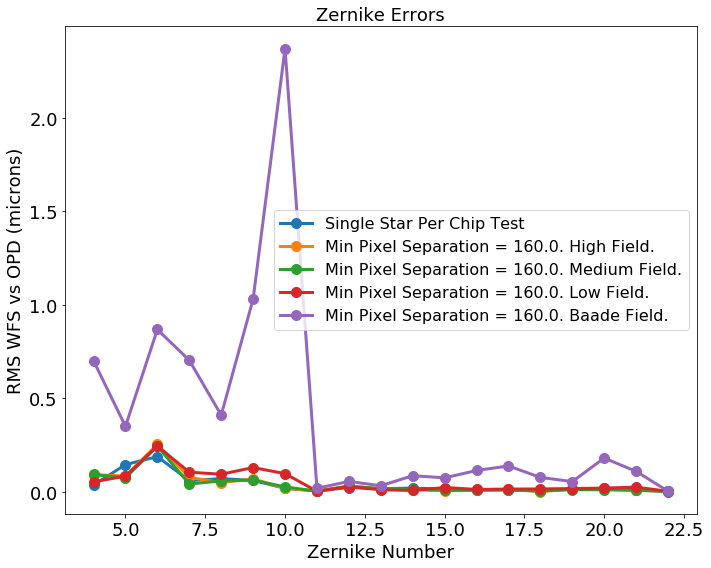

In [51]:
fig = plt.figure(figsize=(10,8))

plt.plot(np.arange(19)+4, single_errors, '-o', lw=3, markersize=10, label='Single Star Per Chip Test')

pix_array = [160, 70]
#for i in [0, 1]:
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeHighErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. High Field.' % pix_array[i])
pix_array = [160, 70]
#for i in [0, 1]:
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeMedErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Medium Field.' % pix_array[i])
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeLowErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Low Field.' % pix_array[i])
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeBaadeErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Baade Field.' % pix_array[i])
plt.xlabel('Zernike Number', size=18)
plt.ylabel('RMS WFS vs OPD (microns)', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - single[:3])**2., axis=0)), label='single donut', lw=3)
plt.legend(fontsize=16)
plt.title('Zernike Errors', size=18)
    
plt.tight_layout()

It seems that all results perform similarly to the single donut baseline except the Baade's Window field which is the most densely populated field. To get a better view of the other 3 fields we exclude Baade results and replot below.

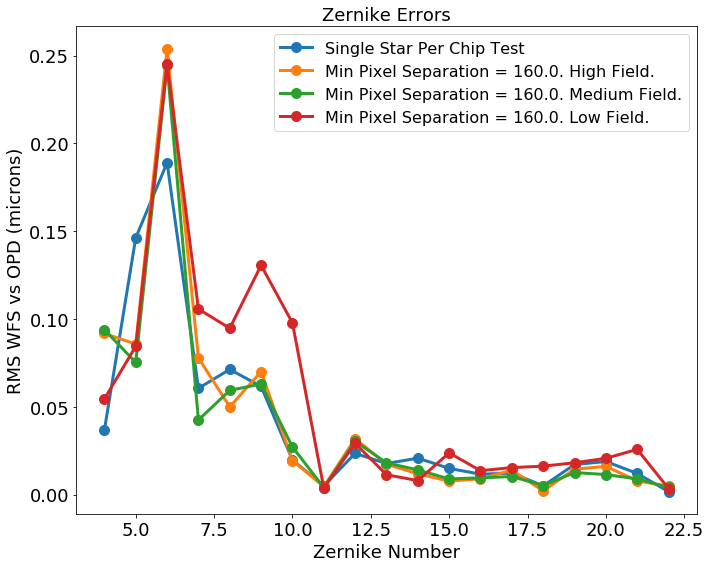

In [52]:
fig = plt.figure(figsize=(10,8))

plt.plot(np.arange(19)+4, single_errors, '-o', lw=3, markersize=10, label='Single Star Per Chip Test')

pix_array = [160, 70]
#for i in [0, 1]:
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeHighErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. High Field.' % pix_array[i])
pix_array = [160, 70]
#for i in [0, 1]:
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeMedErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Medium Field.' % pix_array[i])
for i in [0]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeLowErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Low Field.' % pix_array[i])
#for i in [0]:
#    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeBaadeErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Baade Field.' % pix_array[i])

plt.xlabel('Zernike Number', size=18)
plt.ylabel('RMS WFS vs OPD (microns)', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - single[:3])**2., axis=0)), label='single donut', lw=3)
plt.legend(fontsize=16)
plt.title('Zernike Errors', size=18)
    
plt.tight_layout()

The High and Medium galactic fields perform very close to the single donut baseline case with the only significant discrepancies at Zernikes #5 and 6. We see that at the Low galactic latitude field we are starting to show some decline in performance but we are still below about 0.25 microns at the worst from the OPD measured Zernike results.

### Performace at 70 pixel minimum donut separation

As a second experiment we shrink the minimum pixel separation to allow some blended donuts to appear. The results deteriorate especially for the Baade and Medium fields.

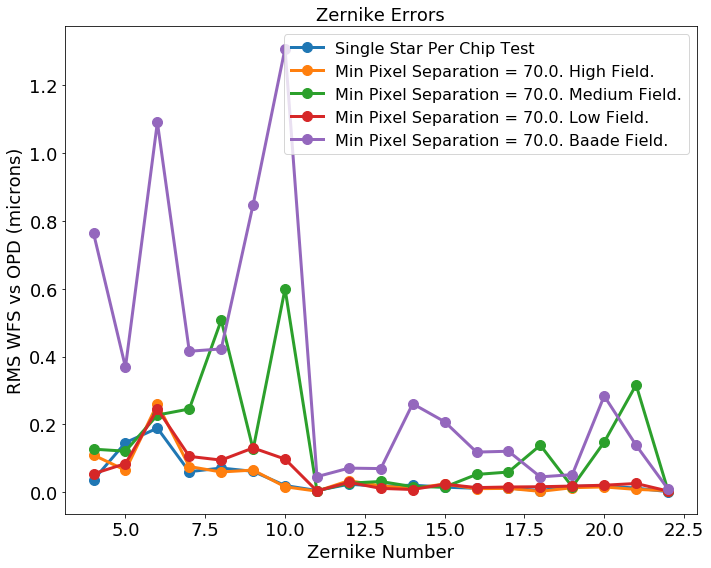

In [53]:
fig = plt.figure(figsize=(10,8))

plt.plot(np.arange(19)+4, single_errors, '-o', lw=3, markersize=10, label='Single Star Per Chip Test')

pix_array = [160, 70]
#for i in [0, 1]:
for i in [1]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeHighErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. High Field.' % pix_array[i])
pix_array = [160, 70]
#for i in [0, 1]:
for i in [1]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeMedErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Medium Field.' % pix_array[i])
for i in [1]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeLowErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Low Field.' % pix_array[i])
for i in [1]:
    plt.plot(np.arange(19)+4, np.sqrt(np.mean(np.square(zernikeBaadeErrors), axis=1)[:, i]), '-o', lw=3, markersize=10, label='Min Pixel Separation = %.1f. Baade Field.' % pix_array[i])

plt.xlabel('Zernike Number', size=18)
plt.ylabel('RMS WFS vs OPD (microns)', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - single[:3])**2., axis=0)), label='single donut', lw=3)
plt.legend(fontsize=16)
plt.title('Zernike Errors', size=18)
    
plt.tight_layout()

## Look at images and donuts measured in each field

## High Latitude Field Results

In [23]:
high_results_df = pd.read_csv('/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/high_lat/image_donut_df.csv', index_col=0)

In [24]:
high_results_df

,x_center,y_center,blended,blended_with,flux,ra,dec,raft,sensor,mag
0,1371.792208,2808.264935,False,NaN,8985919.00,359.720345,0.197682,R22,S02,15.0
1,2755.032172,282.254692,False,NaN,8792148.00,359.860708,0.274501,R22,S02,15.0
2,2506.219595,3379.635135,False,NaN,6583375.50,359.688612,0.260720,R22,S02,15.0
3,2633.840637,609.872510,False,NaN,4798201.00,359.842503,0.267772,R22,S02,15.0
4,2542.824635,2363.557411,False,NaN,3244552.00,359.745065,0.262740,R22,S02,15.0
...,...,...,...,...,...,...,...,...,...,...
59,1171.054852,1447.329114,False,NaN,3648814.75,0.265370,-0.282974,R22,S20,15.0
60,1063.105263,3265.445614,False,NaN,3490531.75,0.164355,-0.288985,R22,S20,15.0
61,408.714859,3885.746988,False,NaN,3321284.50,0.129898,-0.325347,R22,S20,15.0
62,684.893382,3177.036765,False,NaN,3107053.00,0.169272,-0.309998,R22,S20,15.0


In [25]:
from scipy.spatial.distance import cdist

In [26]:
sensor_list = np.unique(high_results_df['sensor'].values)

In [27]:
high_results_df['min_sep'] = 0.

In [28]:
for sensor_name in sensor_list:
    # Find distances between each pair of objects
    sensor_df = high_results_df.query('sensor == "%s"' % sensor_name)
    dist_matrix = cdist(sensor_df[['x_center', 'y_center']], sensor_df[['x_center', 'y_center']])
    # Don't need repeats of each pair
    dist_matrix_upper = np.triu(dist_matrix)
    
    min_sep = []
    for i in range(len(dist_matrix)):
        min_idx_arr = np.argsort(dist_matrix[i])
        min_sep.append(dist_matrix[i][min_idx_arr[1]])
    high_results_df['min_sep'].loc[sensor_df.index.values] = min_sep

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
high_results_df

,x_center,y_center,blended,blended_with,flux,ra,dec,raft,sensor,mag,min_sep
0,1371.792208,2808.264935,False,NaN,8985919.00,359.720345,0.197682,R22,S02,15.0,709.022885
1,2755.032172,282.254692,False,NaN,8792148.00,359.860708,0.274501,R22,S02,15.0,349.314790
2,2506.219595,3379.635135,False,NaN,6583375.50,359.688612,0.260720,R22,S02,15.0,420.178116
3,2633.840637,609.872510,False,NaN,4798201.00,359.842503,0.267772,R22,S02,15.0,349.314790
4,2542.824635,2363.557411,False,NaN,3244552.00,359.745065,0.262740,R22,S02,15.0,595.825928
...,...,...,...,...,...,...,...,...,...,...,...
59,1171.054852,1447.329114,False,NaN,3648814.75,0.265370,-0.282974,R22,S20,15.0,109.805496
60,1063.105263,3265.445614,False,NaN,3490531.75,0.164355,-0.288985,R22,S20,15.0,388.407455
61,408.714859,3885.746988,False,NaN,3321284.50,0.129898,-0.325347,R22,S20,15.0,364.514487
62,684.893382,3177.036765,False,NaN,3107053.00,0.169272,-0.309998,R22,S20,15.0,388.407455


In [30]:
loc_map = {x: [int(x[1]), int(x[2])] for x in sensor_list}

In [31]:
loc_map

{'S00': [0, 0],
 'S01': [0, 1],
 'S02': [0, 2],
 'S10': [1, 0],
 'S11': [1, 1],
 'S12': [1, 2],
 'S20': [2, 0],
 'S21': [2, 1],
 'S22': [2, 2]}

#### How many donuts used in each chip at a given separation?

In [32]:
plots_sep = 160.

In [33]:
sensor_name, counts = np.unique(high_results_df.query('min_sep >= %f' % plots_sep)['sensor'], return_counts=True)
sensor_counts_high = {x: y for x, y in zip(sensor_name, counts)}

In [34]:
ccd_plot_colors = ['pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray']

Text(0.5, 1.0, 'High Latitude with 160.0 minimum separation')

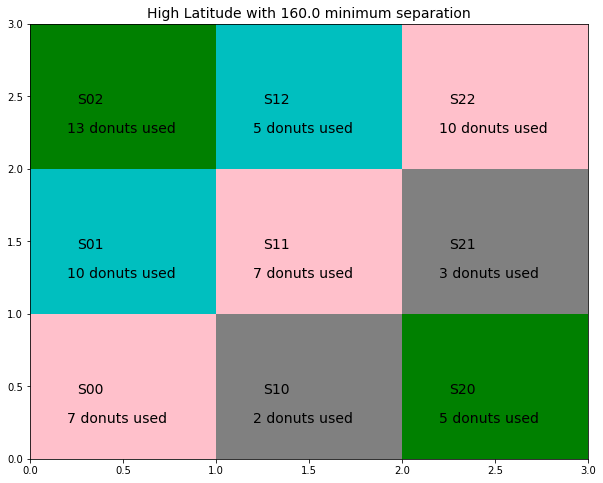

In [35]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(10, 8))
i = 0
for sensor_name in sensor_list:
    sensor_loc = loc_map[sensor_name]
    ax = plt.gca()
    rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    ax.add_patch(rect)
    plt.text(sensor_loc[0]+0.2, sensor_loc[1]+0.25, '%i donuts used' % sensor_counts_high[sensor_name], fontsize=14)
    plt.text(sensor_loc[0]+0.25, sensor_loc[1]+0.45, '%s' % sensor_name, fontsize=14)
    i += 1
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('High Latitude with %.1f minimum separation' % plots_sep, size=14)

In [36]:
butler_repo_high = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_gt11_reingest/input/rerun/run1/'

In [37]:
high_butler = dafPersist.Butler(butler_repo_high)

In [38]:
raft = 'R22'
sensor = 'S01'
data_id = {'visit':9006002, 'raftName':raft, 'detectorName':sensor}
im = high_butler.get('postISRCCD', data_id)

In [39]:
dmCamX = high_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['x_center']
dmCamY = im.getDimensions()[1] - high_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['y_center']

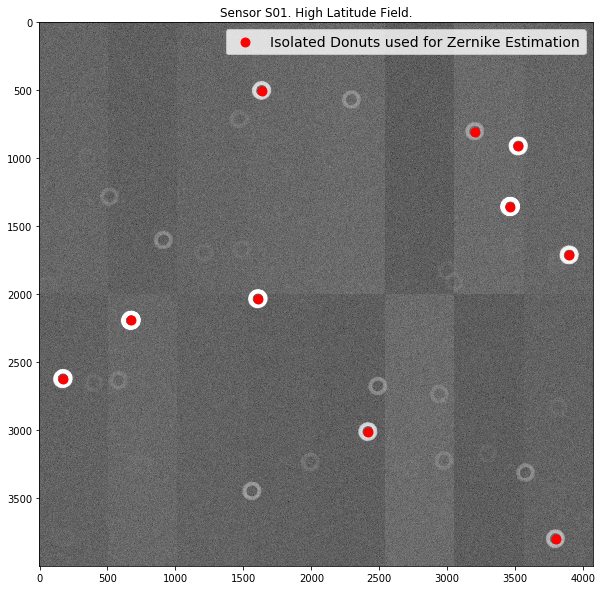

In [40]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(im.image.array, vmin=150, vmax=1200, cmap=plt.cm.Greys_r, norm=colors.LogNorm())
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r', label='Isolated Donuts used for Zernike Estimation', s=80)
plt.title('Sensor %s. High Latitude Field.' % sensor)
plt.legend(fontsize=14)

## How do we get the isolated donuts? (Intro to new donut detection)

Load the methods we use to create templates and detect donuts.

In [41]:
from lsst.ts.wep.cwfs.TemplateUtils import createTemplateImage
from lsst.ts.wep.bsc.DonutDetector import DonutDetector
from lsst.ts.wep.Utility import DefocalType

The first step after loading the code is to load a template donut image appropriate for the sensor. There are two types of templates available for donut detection:
* `model`: cMask model in the `ts_wep` code
* `phosim`: donut images created using phosim at the center of each chip

Here we use the `model` method at the center of the chip we are looking at as the template and load it into the `DonutDetector` code

In [42]:
template = createTemplateImage(DefocalType.Intra, '%s_%s' % (raft, sensor), [[2000., 2000.]], 'model', 160.)
donut_detect = DonutDetector(template)

We then feed in the template and correlate the Exposure with the template to find peaks that signify the locations of donuts.

In [43]:
from lsst.afw.image import ImageF
binary_exp, binary_template = donut_detect.thresholdExpFAndTemp(im)

binary_template_image = ImageF(np.shape(donut_detect.template)[0],
                               np.shape(donut_detect.template)[1])
binary_template_image.array[:] = binary_template
new_exp = donut_detect.correlateExposureWithImage(
    binary_exp, binary_template_image
)

This gives us an image that looks like this:

Text(0.5, 1.0, 'Defocal image correlated with Donut template')

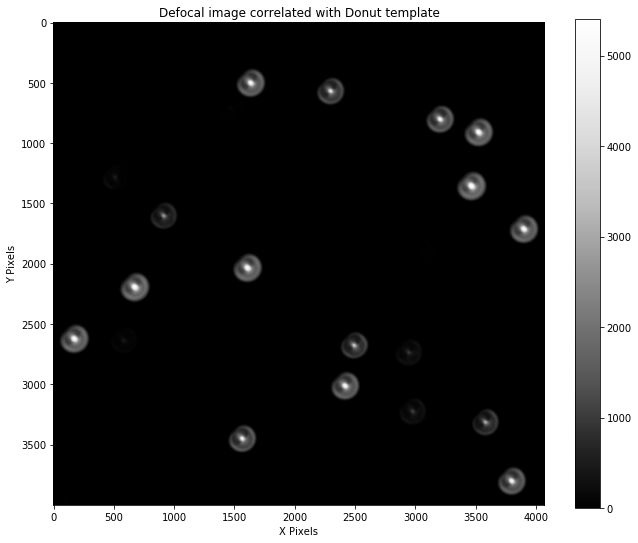

In [44]:
fig = plt.figure(figsize=(11,9))
plt.imshow(new_exp.image.array, cmap=plt.get_cmap('Greys_r'))
plt.colorbar()
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title('Defocal image correlated with Donut template')

To make sure we are getting the peaks we then record all pixels that have a value of at least 90% of the maximum value in the correlated image. We show this in the left panel of the figure below.


Then using these (x,y) pixel locations we cluster the results using the `DBSCAN` method from scikit-learn to find the center locations that we record
as the location of donuts. These position are shown in the right panel below.

In [45]:
min_separation_distance = 160
donut_df = donut_detect.detectDonuts(im, min_separation_distance)

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
x_cut, y_cut = np.where(new_exp.image.array > 0.9*np.max(new_exp.image.array))

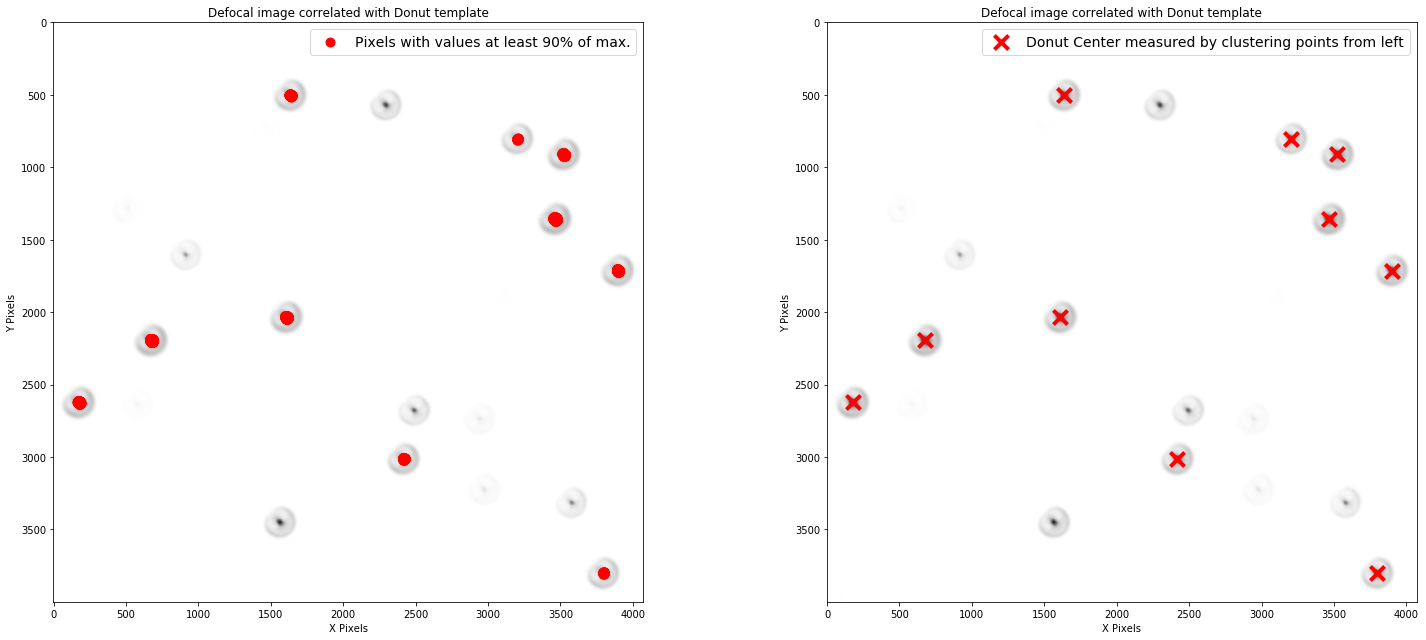

In [47]:
fig = plt.figure(figsize=(22,9))

fig.add_subplot(1,2,1)
plt.imshow(new_exp.image.array, cmap=plt.cm.Greys)
#plt.colorbar()
plt.scatter(y_cut, x_cut, c='r', s=80, label='Pixels with values at least 90% of max.')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title('Defocal image correlated with Donut template')
plt.legend(fontsize=14)

fig.add_subplot(1,2,2)
plt.imshow(new_exp.image.array, cmap=plt.get_cmap('Greys'))
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title('Defocal image correlated with Donut template')
plt.scatter(donut_df['x_center'], donut_df['y_center'], c='r', marker='x', lw=4, s=200, label='Donut Center measured by clustering points from left')
plt.legend(fontsize=14)

plt.tight_layout()

Finally, we determine which donuts to keep based upon a set separation distance we define in the file `policy/default.yaml`. For now
we set it at 160 pixels and the donuts with centers that are at least this far from other donut centers are kept for evaluation.

In [48]:
ranked_unblended_df = donut_detect.rankUnblendedByFlux(donut_df, im)

In [49]:
ranked_unblended_df

,x_center,y_center,blended,blended_with,flux
0,3463.409009,1356.845045,False,None,13737017.00
1,676.397614,2193.994036,False,None,12240417.00
3,1609.107438,2034.553719,False,None,7519991.00
2,176.203438,2622.315186,False,None,7026978.50
4,3522.922636,911.366762,False,None,5845822.00
5,3897.215686,1712.826797,False,None,5080931.50
6,1636.227273,503.702020,False,None,3673146.25
7,2418.054945,3012.060440,False,None,3624017.50
8,3797.287671,3800.616438,False,None,2710484.00
9,3203.951220,804.585366,False,None,2390899.50


Here we show the result from running the close loop with the `PostISRCCD` image on the left and the correlated image on the right.

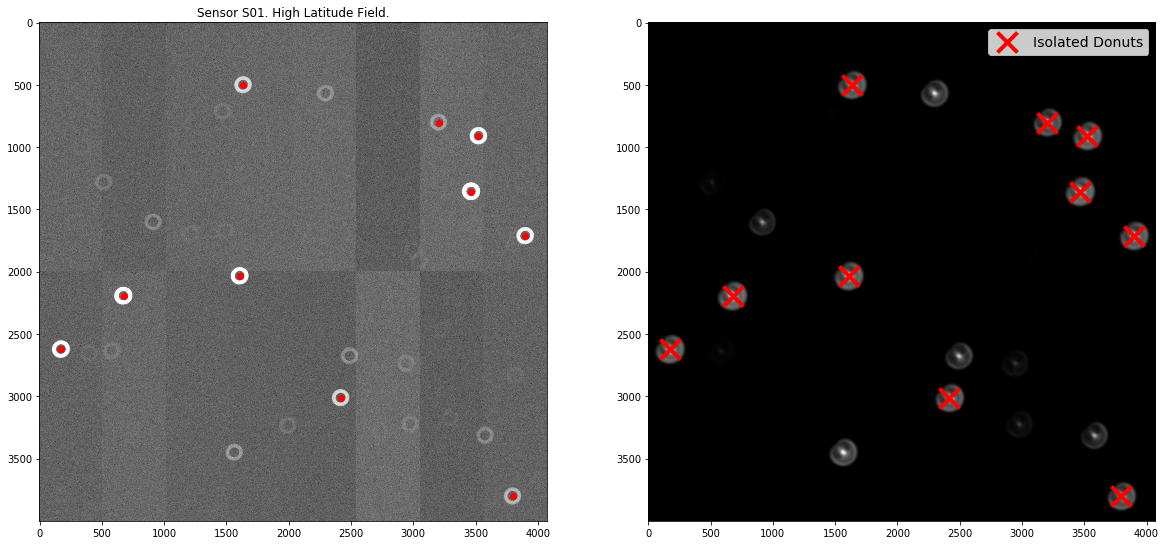

In [50]:
fig = plt.figure(figsize=(20, 12))

fig.add_subplot(1,2,1)
plt.imshow(im.image.array, vmin=150, vmax=1200, cmap=plt.cm.Greys_r, norm=colors.LogNorm())
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r')
plt.title('Sensor %s. High Latitude Field.' % sensor)

fig.add_subplot(1,2,2)
plt.imshow(new_exp.image.array, cmap=plt.cm.Greys_r)
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r', marker='x', s=400, lw=4, label='Isolated Donuts')
plt.legend(fontsize=14)
# plt.scatter(y_cut, x_cut, c='C0')
# plt.scatter(donut_df['x_center'], donut_df['y_center'], c='white')

### Medium Latitude Field Results

In [54]:
med_results_df = pd.read_csv('/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/medium_lat/image_donut_df.csv', index_col=0)

In [55]:
med_results_df

,x_center,y_center,blended,blended_with,flux,ra,dec,raft,sensor,mag
0,1697.466667,1022.781197,False,NaN,28089870.00,359.819552,0.215751,R22,S02,15.0
1,763.784153,3589.188525,False,NaN,12026590.00,359.676952,0.163910,R22,S02,15.0
2,804.000000,2758.437299,False,NaN,9171275.00,359.723108,0.166133,R22,S02,15.0
3,1360.990826,2374.250765,False,NaN,8318665.00,359.744459,0.197075,R22,S02,15.0
4,189.244755,69.510490,False,NaN,8184653.50,359.872506,0.131933,R22,S02,15.0
...,...,...,...,...,...,...,...,...,...,...
102,3300.256637,2629.017699,False,NaN,4162630.50,0.199690,-0.164679,R22,S20,15.0
103,639.333333,2187.880000,False,NaN,3701128.00,0.224231,-0.312522,R22,S20,15.0
104,729.983607,2625.868852,False,NaN,3639996.25,0.199895,-0.307489,R22,S20,15.0
105,67.000000,165.000000,False,NaN,3596650.50,0.336625,-0.344301,R22,S20,15.0


In [56]:
med_results_df['min_sep'] = 0.

In [57]:
for sensor_name in sensor_list:
    # Find distances between each pair of objects
    sensor_df = med_results_df.query('sensor == "%s"' % sensor_name)
    dist_matrix = cdist(sensor_df[['x_center', 'y_center']], sensor_df[['x_center', 'y_center']])
    # Don't need repeats of each pair
    dist_matrix_upper = np.triu(dist_matrix)
    
    min_sep = []
    for i in range(len(dist_matrix)):
        min_idx_arr = np.argsort(dist_matrix[i])
        min_sep.append(dist_matrix[i][min_idx_arr[1]])
    med_results_df['min_sep'].loc[sensor_df.index.values] = min_sep
    

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
sensor_list = np.unique(med_results_df['sensor'].values)

In [59]:
loc_map = {x: [int(x[1]), int(x[2])] for x in sensor_list}

In [60]:
loc_map

{'S00': [0, 0],
 'S01': [0, 1],
 'S02': [0, 2],
 'S10': [1, 0],
 'S11': [1, 1],
 'S12': [1, 2],
 'S20': [2, 0],
 'S21': [2, 1],
 'S22': [2, 2]}

#### How many donuts used in each chip at a given separation?

In [61]:
plots_sep = 160.

In [62]:
sensor_name, counts = np.unique(med_results_df.query('min_sep >= %f' % plots_sep)['sensor'], return_counts=True)
sensor_counts_med = {x: y for x, y in zip(sensor_name, counts)}

In [63]:
sensor_counts_med

{'S00': 17,
 'S01': 8,
 'S02': 15,
 'S10': 9,
 'S11': 11,
 'S12': 4,
 'S20': 15,
 'S21': 3,
 'S22': 19}

In [64]:
ccd_plot_colors = ['pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray']

Text(0.5, 1.0, 'Medium Latitude with 160.0 minimum separation')

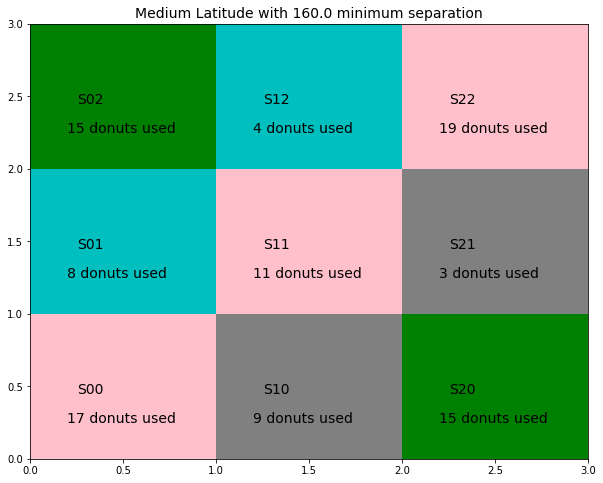

In [65]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(10, 8))
i = 0
for sensor_name in sensor_list:
    sensor_loc = loc_map[sensor_name]
    ax = plt.gca()
    rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    ax.add_patch(rect)
    plt.text(sensor_loc[0]+0.2, sensor_loc[1]+0.25, '%i donuts used' % sensor_counts_med[sensor_name], fontsize=14)
    plt.text(sensor_loc[0]+0.25, sensor_loc[1]+0.45, '%s' % sensor_name, fontsize=14)
    i += 1
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Medium Latitude with %.1f minimum separation' % plots_sep, size=14)

In [69]:
butler_repo_med = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_med_gt11_reingest/input/rerun/run1/'

In [70]:
med_butler = dafPersist.Butler(butler_repo_med)

In [71]:
raft = 'R22'
sensor = 'S01'
data_id = {'visit':9006002, 'raftName':raft, 'detectorName':sensor}
im = med_butler.get('postISRCCD', data_id)

In [72]:
dmCamX = med_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['x_center']
dmCamY = im.getDimensions()[1] - med_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['y_center']

In [73]:
template = createTemplateImage(DefocalType.Intra, '%s_%s' % (raft, sensor), [[2000., 2000.]], 'model', 160.)
donut_detect = DonutDetector(template)

In [74]:
donut_df = donut_detect.detectDonuts(im, 160.)

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
ranked_unblended_df = donut_detect.rankUnblendedByFlux(donut_df, im)

In [76]:
ranked_unblended_df

,x_center,y_center,blended,blended_with,flux
0,321.066239,154.566239,False,None,33000556.00
1,3934.043732,743.609329,False,None,17049052.00
2,3364.027027,414.810811,False,None,8871807.00
3,1686.392157,624.294118,False,None,8048168.50
4,2985.342466,3271.452055,False,None,6209722.00
5,864.336842,1585.757895,False,None,5200256.00
6,2276.000000,467.000000,False,None,4227420.50
7,3601.000000,2070.000000,False,None,3854501.75


In [77]:
from lsst.afw.image import ImageF
binary_exp, binary_template = donut_detect.thresholdExpFAndTemp(im)

binary_template_image = ImageF(np.shape(donut_detect.template)[0],
                               np.shape(donut_detect.template)[1])
binary_template_image.array[:] = binary_template
new_exp = donut_detect.correlateExposureWithImage(
    binary_exp, binary_template_image
)

In [78]:
x_cut, y_cut = np.where(new_exp.image.array > 0.9*np.max(new_exp.image.array))

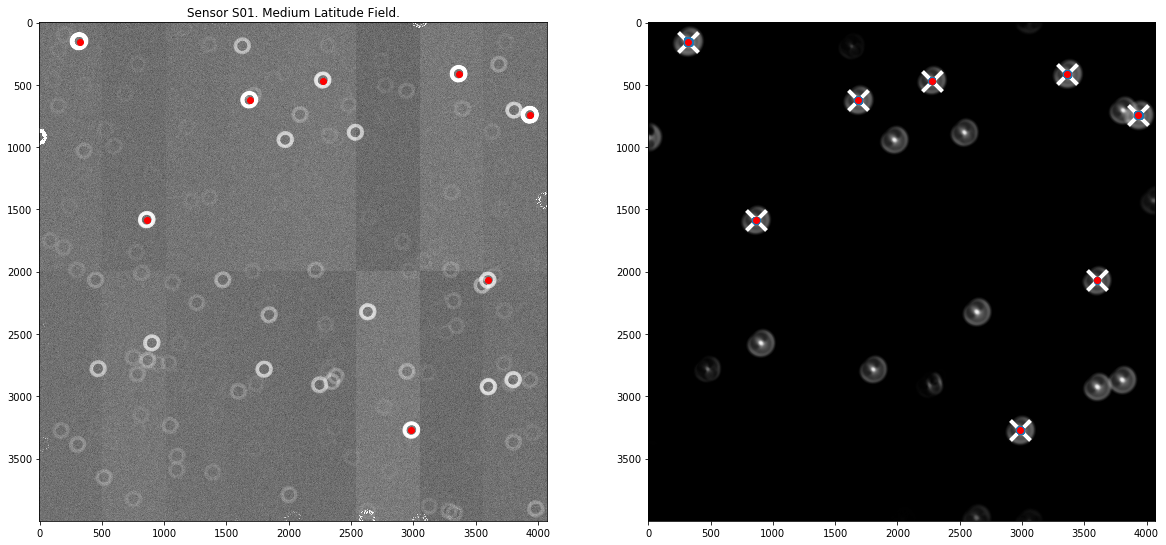

In [79]:
from matplotlib import colors
fig = plt.figure(figsize=(20, 12))

fig.add_subplot(1,2,1)
plt.imshow(im.image.array, vmin=150, vmax=1200, cmap=plt.cm.Greys_r, norm=colors.LogNorm())
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r')
plt.title('Sensor %s. Medium Latitude Field.' % sensor)

fig.add_subplot(1,2,2)
plt.imshow(new_exp.image.array, cmap=plt.cm.Greys_r)
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='white', marker='x', s=400, lw=4, label='Isolated Donuts')
plt.scatter(y_cut, x_cut, c='C0')
plt.scatter(donut_df['x_center'], donut_df['y_center'], c='r')

### Low Latitude Field Results

In [70]:
low_results_df = pd.read_csv('/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/low_lat/image_donut_df.csv', index_col=0)

In [71]:
low_results_df

,x_center,y_center,blended,blended_with,flux,ra,dec,raft,sensor,mag
0,1607.715294,2565.303529,False,NaN,39386564.00,359.733847,0.210787,R22,S02,15.0
1,277.562857,1244.688571,False,NaN,26198746.00,359.807210,0.136859,R22,S02,15.0
2,2484.648305,3122.978814,False,NaN,15334155.00,359.702871,0.259518,R22,S02,15.0
3,3386.737288,3057.669492,False,NaN,15114950.00,359.706509,0.309637,R22,S02,15.0
4,3024.009390,898.845070,False,NaN,14953358.00,359.826451,0.289454,R22,S02,15.0
...,...,...,...,...,...,...,...,...,...,...
210,3126.812500,556.437500,False,NaN,8757025.00,0.314845,-0.174302,R22,S20,15.0
211,1697.769231,2052.730769,False,NaN,8621786.00,0.231728,-0.253714,R22,S20,15.0
212,2540.351852,889.222222,False,NaN,8599066.00,0.296363,-0.206890,R22,S20,15.0
213,140.909091,1424.909091,False,NaN,8078332.50,0.266627,-0.340207,R22,S20,15.0


In [72]:
low_results_df['min_sep'] = 0.

In [73]:
for sensor_name in sensor_list:
    # Find distances between each pair of objects
    sensor_df = low_results_df.query('sensor == "%s"' % sensor_name)
    dist_matrix = cdist(sensor_df[['x_center', 'y_center']], sensor_df[['x_center', 'y_center']])
    # Don't need repeats of each pair
    dist_matrix_upper = np.triu(dist_matrix)
    
    min_sep = []
    for i in range(len(dist_matrix)):
        min_idx_arr = np.argsort(dist_matrix[i])
        min_sep.append(dist_matrix[i][min_idx_arr[1]])
    low_results_df['min_sep'].loc[sensor_df.index.values] = min_sep
    

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [74]:
sensor_list = np.unique(low_results_df['sensor'].values)

In [75]:
loc_map = {x: [int(x[1]), int(x[2])] for x in sensor_list}

In [76]:
loc_map

{'S00': [0, 0],
 'S01': [0, 1],
 'S02': [0, 2],
 'S10': [1, 0],
 'S11': [1, 1],
 'S12': [1, 2],
 'S20': [2, 0],
 'S21': [2, 1],
 'S22': [2, 2]}

#### How many donuts used in each chip at a given separation?

In [77]:
plots_sep = 160.

In [78]:
sensor_name, counts = np.unique(low_results_df.query('min_sep >= %f' % plots_sep)['sensor'], return_counts=True)
sensor_counts_low = {x: y for x, y in zip(sensor_name, counts)}

In [79]:
sensor_counts_low

{'S00': 23,
 'S01': 19,
 'S02': 33,
 'S10': 13,
 'S11': 45,
 'S12': 24,
 'S20': 29,
 'S21': 5,
 'S22': 24}

In [80]:
ccd_plot_colors = ['pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray']

In [81]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(10, 8))
i = 0
for sensor_name in sensor_list:
    sensor_loc = loc_map[sensor_name]
    ax = plt.gca()
    rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    ax.add_patch(rect)
    plt.text(sensor_loc[0]+0.2, sensor_loc[1]+0.25, '%i donuts used' % sensor_counts_low[sensor_name], fontsize=14)
    plt.text(sensor_loc[0]+0.25, sensor_loc[1]+0.45, '%s' % sensor_name, fontsize=14)
    i += 1
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Low Latitude with %.1f minimum separation' % plots_sep, size=14)

Text(0.5, 1.0, 'Low Latitude with 160.0 minimum separation')

In [82]:
butler_repo_low = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_low_gt11_reingest/input/rerun/run1/'

In [124]:
low_butler = dafPersist.Butler(butler_repo_low)

In [125]:
raft = 'R22'
sensor = 'S01'
data_id = {'visit':9006002, 'raftName':raft, 'detectorName':sensor}
im = low_butler.get('postISRCCD', data_id)

In [126]:
dmCamX = low_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['x_center']
dmCamY = im.getDimensions()[1] - low_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['y_center']

In [127]:
template = createTemplateImage(DefocalType.Intra, '%s_%s' % (raft, sensor), [[2000., 2000.]], 'model', 160.)
donut_detect = DonutDetector(template)

In [128]:
donut_df = donut_detect.detectDonuts(im, 160.)

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [129]:
ranked_unblended_df = donut_detect.rankUnblendedByFlux(donut_df, im)

/astro/store/epyc/users/brycek/Commissioning/aos/ts_wep/python/lsst/ts/wep/bsc/DonutDetector.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unblended_df['flux'] = unblended_flux


In [130]:
ranked_unblended_df

,x_center,y_center,blended,blended_with,flux
2,780.422535,1283.651408,False,None,40028864.0
5,4009.568528,601.284264,False,None,32178630.0
4,2296.827907,3218.213953,False,None,26892238.0
7,2778.618497,440.219653,False,None,24465630.0
6,763.418478,1036.875000,False,None,24117814.0
8,1607.061728,1515.339506,False,None,21715678.0
11,3276.067568,1859.945946,False,None,21067406.0
9,2029.261438,877.986928,False,None,20320698.0
12,3682.378571,3520.621429,False,None,19586734.0
14,1294.837398,3001.430894,False,None,18751040.0


In [131]:
binary_exp, binary_template = donut_detect.thresholdExpFAndTemp(im)

binary_template_image = ImageF(np.shape(donut_detect.template)[0],
                               np.shape(donut_detect.template)[1])
binary_template_image.array[:] = binary_template
new_exp = donut_detect.correlateExposureWithImage(
    binary_exp, binary_template_image
)

In [132]:
x_cut, y_cut = np.where(new_exp.image.array > 0.9*np.max(new_exp.image.array))

Here we see examples of donuts that were too close together to be included in the final catalog.

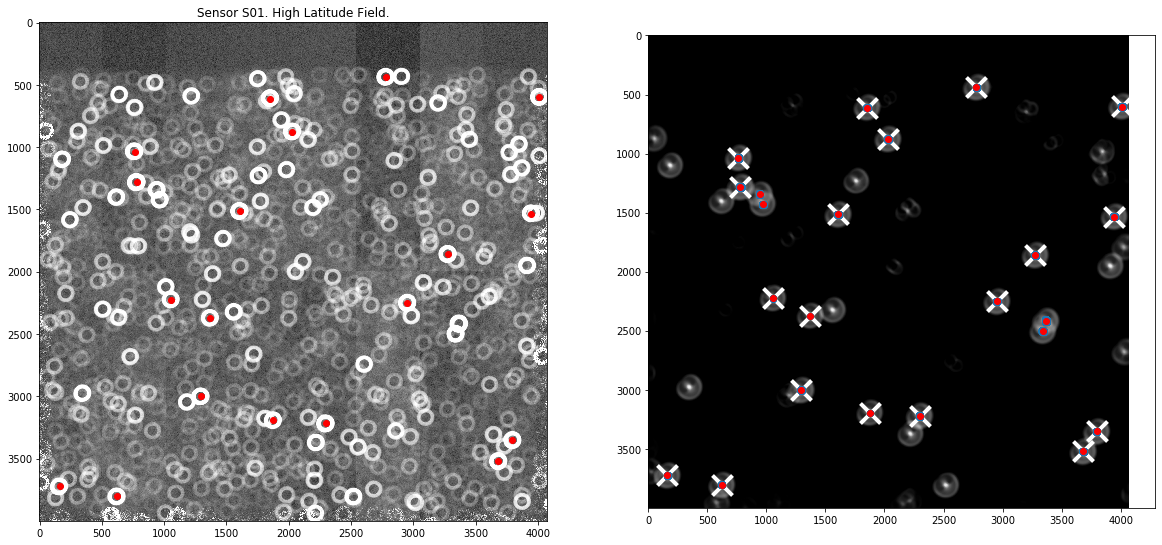

In [142]:
fig = plt.figure(figsize=(20, 12))

fig.add_subplot(1,2,1)
plt.imshow(im.image.array, vmin=250, vmax=1200, cmap=plt.cm.Greys_r, norm=colors.LogNorm())
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r')
plt.title('Sensor %s. High Latitude Field.' % sensor)

fig.add_subplot(1,2,2)
plt.imshow(new_exp.image.array, cmap=plt.cm.Greys_r, vmin=100)
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='white', marker='x', s=400, lw=4, label='Isolated Donuts')
plt.scatter(y_cut, x_cut, c='C0')
plt.scatter(donut_df['x_center'], donut_df['y_center'], c='r')

### Baade's Window Field Results

In [93]:
baade_results_df = pd.read_csv('/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/gaia_results/baade/image_donut_df.csv', index_col=0)

In [94]:
baade_results_df

,x_center,y_center,blended,blended_with,flux,ra,dec,raft,sensor,mag
0,2041.176846,1652.492859,False,NaN,10772000.0,359.784567,0.234858,R22,S02,15.0
1,2361.333333,1072.286667,False,NaN,62182224.0,0.051547,0.252744,R22,S12,15.0
2,1759.365854,1223.356098,False,NaN,48117468.0,0.043155,0.219298,R22,S12,15.0
3,1992.917453,2748.787736,False,NaN,46463688.0,359.958395,0.232283,R22,S12,15.0
4,1159.400826,2801.876033,False,NaN,43444672.0,359.955448,0.185969,R22,S12,15.0
...,...,...,...,...,...,...,...,...,...,...
104,2539.348259,2091.402985,False,NaN,27602238.0,0.229570,-0.206954,R22,S20,15.0
105,2063.233645,1951.373832,False,NaN,27570414.0,0.237356,-0.233407,R22,S20,15.0
106,700.500000,1642.500000,False,NaN,25715610.0,0.254532,-0.309119,R22,S20,15.0
107,736.000000,3900.250000,False,NaN,22283944.0,0.129088,-0.307164,R22,S20,15.0


In [95]:
baade_results_df['min_sep'] = 0.

In [96]:
for sensor_name in sensor_list:
    # Find distances between each pair of objects
    sensor_df = baade_results_df.query('sensor == "%s"' % sensor_name)
    if len(sensor_df) == 1:
        min_sep = 999.
    else:
        dist_matrix = cdist(sensor_df[['x_center', 'y_center']], sensor_df[['x_center', 'y_center']])
        # Don't need repeats of each pair
        dist_matrix_upper = np.triu(dist_matrix)

        min_sep = []
        for i in range(len(dist_matrix)):
            min_idx_arr = np.argsort(dist_matrix[i])
            min_sep.append(dist_matrix[i][min_idx_arr[1]])
    baade_results_df['min_sep'].loc[sensor_df.index.values] = min_sep
    

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
sensor_list = np.unique(baade_results_df['sensor'].values)

In [98]:
loc_map = {x: [int(x[1]), int(x[2])] for x in sensor_list}

In [99]:
loc_map

{'S00': [0, 0],
 'S01': [0, 1],
 'S02': [0, 2],
 'S10': [1, 0],
 'S11': [1, 1],
 'S12': [1, 2],
 'S20': [2, 0],
 'S21': [2, 1],
 'S22': [2, 2]}

#### How many donuts used in each chip at a given separation?

In [100]:
plots_sep = 160.

In [101]:
sensor_name, counts = np.unique(baade_results_df.query('min_sep >= %f' % plots_sep)['sensor'], return_counts=True)
sensor_counts_baade = {x: y for x, y in zip(sensor_name, counts)}

In [102]:
sensor_counts_baade

{'S00': 2,
 'S01': 3,
 'S02': 1,
 'S10': 15,
 'S11': 25,
 'S12': 16,
 'S20': 10,
 'S21': 5,
 'S22': 12}

In [103]:
ccd_plot_colors = ['pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray']

In [104]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(10, 8))
i = 0
for sensor_name in sensor_list:
    sensor_loc = loc_map[sensor_name]
    ax = plt.gca()
    rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    ax.add_patch(rect)
    plt.text(sensor_loc[0]+0.2, sensor_loc[1]+0.25, '%i donuts used' % sensor_counts_baade[sensor_name], fontsize=14)
    plt.text(sensor_loc[0]+0.25, sensor_loc[1]+0.45, '%s' % sensor_name, fontsize=14)
    i += 1
plt.xlim(0,3)
plt.ylim(0,3)
plt.title("Baade's Window with %.1f minimum separation" % plots_sep, size=14)

Text(0.5, 1.0, "Baade's Window with 160.0 minimum separation")

In [106]:
butler_repo_baade = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_gt11_reingest/input/rerun/run1/'

In [107]:
baade_butler = dafPersist.Butler(butler_repo_baade)

In [145]:
raft = 'R22'
sensor = 'S01'
data_id = {'visit':9006002, 'raftName':raft, 'detectorName':sensor}
im = baade_butler.get('postISRCCD', data_id)

In [146]:
dmCamX = baade_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['x_center']
dmCamY = im.getDimensions()[1] - baade_results_df.query('sensor == "%s" and min_sep >= %f' % (sensor, plots_sep))['y_center']

In [147]:
template = createTemplateImage(DefocalType.Intra, '%s_%s' % (raft, sensor), [[2000., 2000.]], 'model', 160.)
donut_detect = DonutDetector(template)

In [148]:
donut_df = donut_detect.detectDonuts(im, 160.)

/astro/users/brycek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [149]:
ranked_unblended_df = donut_detect.rankUnblendedByFlux(donut_df, im)

In [150]:
ranked_unblended_df

,x_center,y_center,blended,blended_with,flux
0,2040.926360,2358.286382,False,None,9069598.00
1,447.529984,760.375203,False,None,3704057.75
2,2867.547779,797.993271,False,None,3442578.75


In [151]:
from lsst.afw.image import ImageF
binary_exp, binary_template = donut_detect.thresholdExpFAndTemp(im)

binary_template_image = ImageF(np.shape(donut_detect.template)[0],
                               np.shape(donut_detect.template)[1])
binary_template_image.array[:] = binary_template
new_exp = donut_detect.correlateExposureWithImage(
    binary_exp, binary_template_image
)

In [152]:
x_cut, y_cut = np.where(new_exp.image.array > 0.9*np.max(new_exp.image.array))

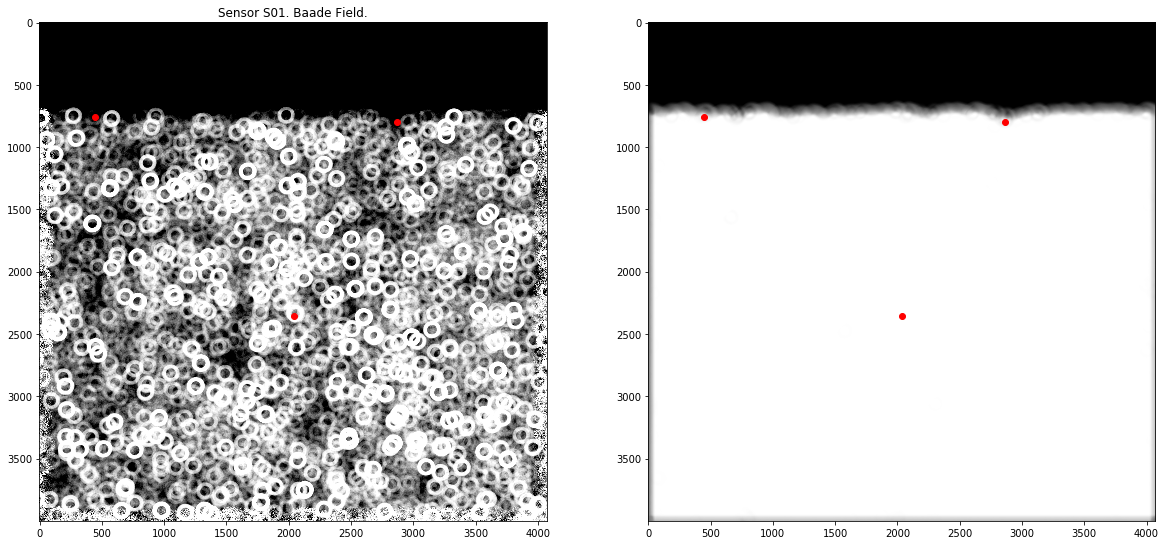

In [153]:
from matplotlib import colors
fig = plt.figure(figsize=(20, 12))

fig.add_subplot(1,2,1)
plt.imshow(im.image.array, vmin=650, vmax=2000, cmap=plt.cm.Greys_r, norm=colors.LogNorm())
#plt.colorbar()
plt.scatter(dmCamX, dmCamY, c='r')
plt.title('Sensor %s. Baade Field.' % sensor)

fig.add_subplot(1,2,2)
plt.imshow(new_exp.image.array, cmap=plt.cm.Greys_r)
#plt.colorbar()
#plt.scatter(dmCamX, dmCamY, c='white', marker='x', s=400, lw=4, label='Isolated Donuts')
#plt.scatter(y_cut, x_cut, c='C0')
plt.scatter(donut_df['x_center'], donut_df['y_center'], c='r')